In [1]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

# Ukázka na dvou reálných případech

# ETEX
K dispozici máte data z European Tracer EXperimentu, kdy byla vypouštěna po danou dobu a s danou intenzitou jistá látka, která byla následně měřena v rámci Evropy:
![etex_auto.jpg](etex_auto.jpg)
![etex_mapa.jpg](etex_mapa.jpg)

## Data

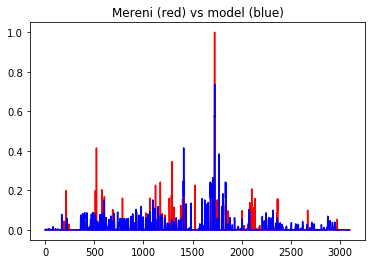

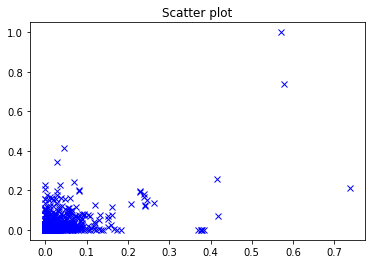

In [19]:
X = sio.loadmat("data_ETEX.mat")["X"]
y = sio.loadmat("data_ETEX.mat")["y"]
beta_true = sio.loadmat("data_ETEX.mat")["beta_true"]
    
(p,n) = np.shape(X)

#---------------------------------------------
# vykreslete do grafu (jako jednotlive body) zavislost mereni y a teoreticky spravne rekonstrukce X*beta_true
# co z toho muzete usoudit o kvalite predlozenych dat?
#---------------------------------------------
plt.figure()
plt.title('Mereni (red) vs model (blue)')
plt.plot(y, 'r-') # mereni
plt.plot(X@beta_true, 'b-') # model

plt.figure()
plt.title('Scatter plot')
plt.plot(X@beta_true,y, 'bx') # model vs data

## Použití bayesian sparse regression

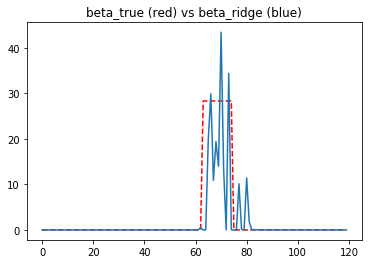

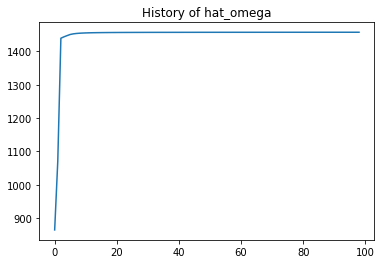

In [18]:
c0 = 1e-10
d0 = 1e-10
a0 = 1e-10
b0 = 1e-10

hat_v = np.ones(n)
hat_omega = 1/np.ndarray.max(X)
hist_omega = []
#---------------------------------------------
# a) pouzijte bayesian sparse regression z prvni casti cviceni
#
# b) modifikujte vypocet tak, aby v \beta byly jen kladne hodnoty
#    (napr. vhodnym "nulovanim")
#---------------------------------------------
for i in range(1,100):
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \beta
    #---------------------------------------------
    sigma_beta = np.linalg.inv(hat_omega*X.T@X + np.diag(hat_v))
    mu_beta = hat_omega*sigma_beta@X.T@y
    mu_beta[mu_beta<=0] = 0 # vynuluj zaporne hodnoty
    hat_beta = mu_beta
    hat_beta_betaT = mu_beta@mu_beta.T + sigma_beta
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty vektoru "v"
    #---------------------------------------------
    aj = (a0 + 0.5) * np.ones(n)
    bj = b0 + 0.5*hat_beta_betaT.diagonal()
    hat_v = aj / bj 
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \omega (staci zkopirovat z predchoziho)
    #---------------------------------------------
    c = c0 + p/2
    d = d0 + 0.5*(y.T@y - 2*y.T@X@hat_beta + np.trace(hat_beta_betaT@X.T@X))
    hat_omega = c/d
    
    hist_omega.append(hat_omega[0])
    
# vysledek ulozime a vytiskneme
beta_VBsparse = hat_beta
    
plt.title('beta_true (red) vs beta_ridge (blue)')
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_VBsparse)

plt.figure()
plt.title('History of hat_omega')
plt.plot(hist_omega)
    
beta_VBsparse = hat_beta

## Použití bayesian ridge regression (pro rychlejší)

In [ ]:
c0 = 1e-10
d0 = 1e-10
hat_omega = 1/np.ndarray.max(X)

#---------------------------------------------
# zkuste na ta sama data pouzit bayesian ridge regression z prvni casti cviceni
# proc neni vysledek idealni?
#---------------------------------------------

    
beta_VB = hat_beta
    
plt.plot(beta_true,color='red',linestyle='dashed')

# Chernobylská data
![chernobyl_obr.jpg](chernobyl_obr.jpg)
Data pokrývají prvních 10 dní po výbuchu (26.4.1986) pro radionuklid Cs134.

In [ ]:
X = sio.loadmat("data_Chernobyl.mat")["X"]
y = sio.loadmat("data_Chernobyl.mat")["y"]
# beta_true neni...

(p,n) = np.shape(X)
    

Text(0.5,0,'x 3h - cas uniku')

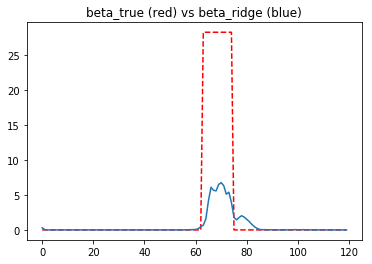

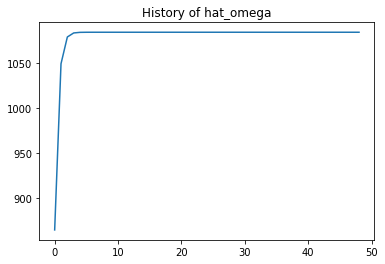

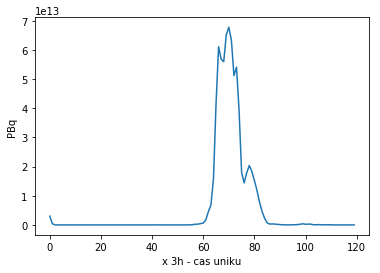

In [20]:
c0 = 1e-10
d0 = 1e-10
hat_omega = 1/np.ndarray.max(X)

#---------------------------------------------
# a) zde bude lepsi pouzit bayesian ridge regression (data jsou zjednodusena a ridke reseni proto neni idealni)
# b) pro rychlejsi: zkuste resit stejny problem pomoci klasicke ridge regression
#---------------------------------------------

hist_omega = []
for i in range(1,50): # budeme iterovat 100x, uvidime, ze to staci
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \beta
    #---------------------------------------------
    sigma_beta = np.linalg.inv(hat_omega*X.T@X + np.identity(n))
    mu_beta = hat_omega*sigma_beta@X.T@y
    hat_beta = mu_beta
    hat_beta_betaT = mu_beta@mu_beta.T + sigma_beta    
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \omega
    #---------------------------------------------
    c = c0 + p/2
    d = d0 + 0.5*(y.T@y - 2*y.T@X@hat_beta + np.trace(hat_beta_betaT@X.T@X))
    hat_omega = c/d
    
    hist_omega.append(hat_omega[0])

# vysledek ulozime a vytiskneme
beta_VBridge = hat_beta
   
plt.figure()
plt.title('beta_true (red) vs beta_ridge (blue)')
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_VBridge)

plt.figure()
plt.title('History of hat_omega')
plt.plot(hist_omega)
    
plt.figure()
plt.plot(beta_VBridge*1e13)
plt.ylabel('PBq')
plt.xlabel('x 3h - cas uniku')